## Import Package

In [ ]:
import cv2
import matplotlib.pyplot as plt
import itertools

In [ ]:
from google.colab import files
image = files.upload()

Saving facedetection3.jpg to facedetection3.jpg


## Face Detection

In [ ]:
def detect_faces(img_path, scaleFactor, minNeighbors, minSize):
    img = cv2.imread(img_path)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.equalizeHist(gray_image) # Untuk meningkatkan kontras gambar

    face_classifier = cv2.CascadeClassifier(
        cv2.data.haarcascades + "haarcascade_frontalface_default.xml" # Model pre-train Haar Cascade untuk deteksi frontal face
    )

    # Parameter:
    # 1. scaleFactor -> mengurangi ukuran gambar input
    # 2. minNeighbors -> mengatur jumlah minimum tetangga yang harus diidentifikasi
    # 3. minSize -> ukuran minimum objek yang akan dideteksi oleh model.
    faces = face_classifier.detectMultiScale(
        gray_image, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize, flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (x, y, w, h) in faces: # Setiap wajah yang terdeteksi akan diberi kotak berwarna hijau
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img_rgb, faces

Best parameters: scaleFactor=1.05, minNeighbors=3, minSize=(30, 30)


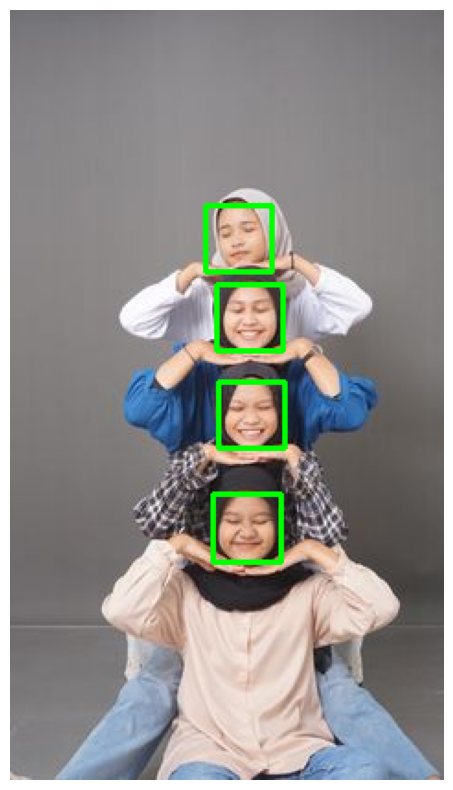

In [ ]:
img_path = 'facedetection3.jpg'

scaleFactors = [1.05, 1.1, 1.15]
minNeighbors = [3, 5, 7]
minSizes = [(30, 30), (40, 40), (50, 50)]

param_combinations = list(itertools.product(scaleFactors, minNeighbors, minSizes))

best_img = None
best_faces = []
best_params = None

for params in param_combinations:
    scaleFactor, minNeighbors, minSize = params
    img_rgb, faces = detect_faces(img_path, scaleFactor, minNeighbors, minSize)

    if len(faces) > len(best_faces):
        best_faces = faces
        best_img = img_rgb
        best_params = params

print(f"Best parameters: scaleFactor={best_params[0]}, minNeighbors={best_params[1]}, minSize={best_params[2]}")
plt.figure(figsize=(20, 10))
plt.imshow(best_img)
plt.axis('off')
plt.show()